##Exploring Boston's City Score **Data**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [8]:
%cd /content/drive/My Drive/VS_Study/

/content/drive/My Drive/VS_Study


*According to Boston.gov,*

"CityScore is an initiative designed to inform the Mayor and city managers about the overall health of the City at a moment’s notice by aggregating key performance metrics into one number"

In [9]:
df = pd.read_csv("BostonCityScore.csv")

In [10]:
df

,metric_name,score_calculated_ts,target,metric_logic,day_score,day_numerator,day_denominator,week_score,week_numerator,week_denominator,month_score,month_numerator,month_denominator,quarter_score,quarter_numerator,quarter_denominator,latest_score_flag
0,LIBRARY USERS,2024-05-13 19:05:22.51401,NaN,current_average / historical_average,NaN,NaN,7616.074074,NaN,NaN,7616.074074,NaN,NaN,8064.952756,NaN,NaN,8112.954667,1
1,LIBRARY USERS,2024-05-11 19:05:27.120657,NaN,current_average / historical_average,NaN,NaN,9052.171429,NaN,NaN,9052.171429,NaN,NaN,8064.952756,NaN,NaN,8112.954667,0
2,BFD INCIDENTS,2024-05-12 19:03:39.420437,NaN,historical_average / current_average,NaN,215.392857,NaN,0.970967,215.392857,221.833333,0.955169,204.883721,214.500000,1.039210,218.130208,209.900000,0
3,BFD INCIDENTS,2024-05-10 19:06:56.213608,NaN,historical_average / current_average,NaN,215.392857,NaN,0.970967,215.392857,221.833333,0.955169,204.883721,214.500000,1.039210,218.130208,209.900000,0
4,LIBRARY USERS,2024-05-09 19:06:29.341974,NaN,current_average / historical_average,NaN,NaN,9052.171429,NaN,NaN,9052.171429,NaN,NaN,8064.952756,NaN,NaN,8112.954667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53912,311 CONSTITUENT EXPERIENCE SURVEYS,2018-03-13 14:36:51,4.0,sum(numerator_value)/sum(denominator_value)/ta...,NaN,NaN,NaN,NaN,NaN,NaN,1.075000,43.000000,10.000000,1.000000,156.000000,39.000000,0
53913,GRAFFITI ON-TIME %,2021-10-24 07:25:51.221647,0.8,sum(numerator_value)/sum(denominator_value)/ta...,NaN,NaN,NaN,0.395833,19.000000,60.000000,0.768634,198.000000,322.000000,0.713429,476.000000,834.000000,0
53914,SIGN INSTALLATION ON-TIME %,2021-11-02 07:26:52.805246,0.8,sum(numerator_value)/sum(denominator_value)/ta...,0.795455,7.000000,11.000000,0.301724,7.000000,29.000000,0.411932,29.000000,88.000000,0.486707,227.000000,583.000000,0
53915,PARKS MAINTENANCE ON-TIME %,2021-11-02 07:30:08.607259,0.8,sum(numerator_value)/sum(denominator_value)/ta...,1.250000,8.000000,8.000000,0.937500,24.000000,32.000000,0.923252,243.000000,329.000000,0.962942,1003.000000,1302.000000,0


###Data Cleaning & Data Wrangling

In [11]:
df.metric_name.value_counts()

metric_name
PARKS MAINTENANCE ON-TIME %           2404
SIGN INSTALLATION ON-TIME %           2404
311 CALL CENTER PERFORMANCE           2404
311 CONSTITUENT EXPERIENCE SURVEYS    2404
SIGNAL REPAIR ON-TIME %               2404
STREETLIGHT ON-TIME %                 2404
POTHOLE ON-TIME %                     2404
MISSED TRASH ON-TIME %                2404
BFD RESPONSE TIME                     2403
CITY SERVICES SATISFACTION SURVEYS    2403
TREE MAINTENANCE ON-TIME %            2403
CODE ENFORCEMENT TRASH COLLECTION     2403
CODE ENFORCEMENT ON-TIME %            2403
LIBRARY USERS                         2402
BPS ATTENDANCE                        2402
BFD INCIDENTS                         2300
STABBINGS (TREND)                     2299
SHOOTINGS (TREND)                     2299
PART 1 CRIMES                         2299
HOMICIDES (TREND)                     2299
GRAFFITI ON-TIME %                    2287
EMS RESPONSE TIME                     2203
ON-TIME PERMIT REVIEWS                1880

In [12]:
df.isnull().sum()

metric_name                0
score_calculated_ts        0
target                 13898
metric_logic               0
day_score              18602
day_numerator          12286
day_denominator        18142
week_score              4205
week_numerator          2132
week_denominator        3873
month_score             1209
month_numerator          861
month_denominator       1035
quarter_score           1087
quarter_numerator        904
quarter_denominator      512
latest_score_flag          0
dtype: int64

Since the main focus is on the "day score", the null values are dropped as they are of no help.

In [13]:
df.dropna(subset = ['day_score'], inplace = True)

In [14]:
df.drop(columns = ['day_numerator', 'day_denominator', 'week_numerator', 'week_denominator', 'month_numerator', 'month_denominator', 'quarter_numerator', 'quarter_denominator', 'latest_score_flag', 'metric_logic'], inplace = True)

In [15]:
df.reset_index(inplace = True)

In [17]:
df.head()

,index,metric_name,score_calculated_ts,target,day_score,week_score,month_score,quarter_score
0,10,BFD INCIDENTS,2024-04-30 19:04:53.231868,NaN,0.987578,0.955912,1.003592,1.037716
1,12,BFD INCIDENTS,2024-04-19 19:04:18.365115,NaN,1.082366,0.912212,1.003592,1.037716
2,16,BFD INCIDENTS,2024-04-21 19:03:43.190539,NaN,1.065799,0.912212,1.003592,1.037716
3,17,BFD INCIDENTS,2024-04-15 19:03:40.357542,NaN,0.912212,0.913922,1.003592,1.037716
4,19,BFD INCIDENTS,2024-04-23 19:03:52.228672,NaN,0.957313,0.977936,1.003592,1.037716


In [18]:
df.drop(columns = ['index'], inplace = True)

In [19]:
df.dtypes

metric_name             object
score_calculated_ts     object
target                 float64
day_score              float64
week_score             float64
month_score            float64
quarter_score          float64
dtype: object

In [20]:
df['score_calculated_ts'] = pd.to_datetime(df['score_calculated_ts'], format = 'mixed')

In [21]:
df['score_calculated_ts'] = df['score_calculated_ts'].dt.date

In [22]:
df['score_calculated_ts'] = pd.to_datetime(df['score_calculated_ts'], format = 'mixed')

In [23]:
df.head()

,metric_name,score_calculated_ts,target,day_score,week_score,month_score,quarter_score
0,BFD INCIDENTS,2024-04-30,NaN,0.987578,0.955912,1.003592,1.037716
1,BFD INCIDENTS,2024-04-19,NaN,1.082366,0.912212,1.003592,1.037716
2,BFD INCIDENTS,2024-04-21,NaN,1.065799,0.912212,1.003592,1.037716
3,BFD INCIDENTS,2024-04-15,NaN,0.912212,0.913922,1.003592,1.037716
4,BFD INCIDENTS,2024-04-23,NaN,0.957313,0.977936,1.003592,1.037716


In [24]:
df['target'] = 1

In [25]:
df.describe()

,score_calculated_ts,target,day_score,week_score,month_score,quarter_score
count,35315,35315.0,35315.000000,35111.000000,35246.000000,34907.000000
mean,2021-02-15 08:58:04.706215424,1.0,1.169299,1.044447,1.021832,1.014020
min,2018-01-01 00:00:00,1.0,0.000000,0.000000,0.000000,0.000000
25%,2019-07-20 00:00:00,1.0,0.896695,0.894495,0.889262,0.884383
50%,2021-01-23 00:00:00,1.0,1.062802,1.018519,1.010499,1.002786
75%,2022-09-26 00:00:00,1.0,1.250000,1.206140,1.183775,1.166299
max,2024-05-13 00:00:00,1.0,204.238095,10.500000,9.436575,15.977193
std,NaN,0.0,2.020167,0.350943,0.247193,0.234752


The above results show that there are some outliers in the dataset.

For eg, the maximum "day score" is 204, which doesnt seem to be a good entry.

In [26]:
df['week_score'].fillna(df['day_score'], inplace = True)
df['month_score'].fillna(df['week_score'], inplace = True)
df['quarter_score'].fillna(df['month_score'], inplace = True)

Calculating z-scores for the data for outlier detection, and imputing them with median values

In [27]:
df['z_score_day'] = stats.zscore(df['day_score'])
df['z_score_week'] = stats.zscore(df['week_score'])
df['z_score_month'] = stats.zscore(df['month_score'])
df['z_score_quarter'] = stats.zscore(df['quarter_score'])

In [28]:
median_day = df['day_score'].median()
median_week = df['week_score'].median()
median_month = df['month_score'].median()
median_quarter = df['quarter_score'].median()

In [29]:
for i in range(0, len(df)):
  if df['z_score_day'].iloc[i] > 3 or df['z_score_day'].iloc[i] < -3:
        df['day_score'].iloc[i] = median_day
  if df['z_score_week'].iloc[i] > 3 or df['z_score_week'].iloc[i] < -3:
        df['week_score'].iloc[i] = median_week
  if df['z_score_month'].iloc[i] > 3 or df['z_score_month'].iloc[i] < -3:
        df['month_score'].iloc[i] = median_month
  if df['z_score_quarter'].iloc[i] > 3 or df['z_score_quarter'].iloc[i] < -3:
        df['quarter_score'].iloc[i] = median_quarter

In [30]:
df.describe()

,score_calculated_ts,target,day_score,week_score,month_score,quarter_score,z_score_day,z_score_week,z_score_month,z_score_quarter
count,35315,35315.0,35315.000000,35315.000000,35315.000000,35315.000000,3.531500e+04,3.531500e+04,3.531500e+04,3.531500e+04
mean,2021-02-15 08:58:04.706215424,1.0,1.086082,1.027009,1.018197,1.013716,-1.267569e-17,7.541028e-16,4.869074e-16,2.623666e-16
min,2018-01-01 00:00:00,1.0,0.000000,0.000000,0.280172,0.315554,-5.788211e-01,-2.974838e+00,-4.132310e+00,-4.331545e+00
25%,2019-07-20 00:00:00,1.0,0.896695,0.895062,0.894803,0.888956,-1.349432e-01,-4.240573e-01,-5.332055e-01,-5.556032e-01
50%,2021-01-23 00:00:00,1.0,1.062802,1.018519,1.010499,1.004935,-5.271769e-02,-7.222548e-02,-4.506947e-02,-4.202443e-02
75%,2022-09-26 00:00:00,1.0,1.250000,1.202830,1.181402,1.163178,3.994826e-02,4.613973e-01,6.540079e-01,6.467492e-01
max,2024-05-13 00:00:00,1.0,7.168367,2.090909,1.750727,1.713825,1.005222e+02,2.694846e+01,3.403652e+01,6.386640e+01
std,NaN,0.0,0.482304,0.258099,0.212100,0.200101,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00


From the above result, it can be seen that the outliers have been handled for day, week, month and quarter score with z-score and median

In [31]:
#day score above 1.5 is not useful, point of interest is the value > 1 or not
df = df.loc[df['day_score']< 1.5]

In [32]:
# Adding a month and year column
df['score_calculated_year'] = df['score_calculated_ts'].dt.year
df['score_calculated_month'] = df['score_calculated_ts'].dt.month_name()

Creating a metadata dataframe that has calculated fields

In [33]:
df_metadata = pd.DataFrame()

In [34]:
df_metadata = df[df['day_score'] >= 1.0].groupby(['metric_name','score_calculated_year'], as_index = False)[['day_score']].count()

In [35]:
result_df = df[df['day_score'] >= 0].groupby(['metric_name', 'score_calculated_year'], as_index=False)[['day_score']].count()

In [36]:
df_metadata = pd.merge(df_metadata, result_df, on=['metric_name', 'score_calculated_year'])


In [37]:
df_metadata.rename(columns = {'day_score_x': 'good_calls', 'day_score_y': 'total_recorded_calls'}, inplace = True)

In [38]:
#drop 2024 data, as it not required for analysis
df_metadata = df_metadata[df_metadata['score_calculated_year']!=2024]
df = df[df['score_calculated_year']!=2024]

In [39]:
df_metadata['perc_good'] = (df_metadata['good_calls']/df_metadata['total_recorded_calls'])*100

In [40]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
years = [2018, 2019, 2020, 2021, 2022, 2023]

Calculating monthly recorded calls, and storing them in metadata in wide format

In [41]:
for month in months:
  col_name = month+'_recorded_calls'
  df_metadata[col_name] = df[df['score_calculated_month'] == month].groupby(['metric_name','score_calculated_year'], as_index = False).count()['day_score']

In [42]:
df_metadata.head()

,metric_name,score_calculated_year,good_calls,total_recorded_calls,perc_good,January_recorded_calls,February_recorded_calls,March_recorded_calls,April_recorded_calls,May_recorded_calls,June_recorded_calls,July_recorded_calls,August_recorded_calls,September_recorded_calls,October_recorded_calls,November_recorded_calls,December_recorded_calls
0,311 CALL CENTER PERFORMANCE,2018,239,379,63.060686,30.0,28.0,39.0,29.0,28.0,26.0,31.0,34.0,32.0,31.0,40.0,31.0
1,311 CALL CENTER PERFORMANCE,2019,157,360,43.611111,30.0,28.0,37.0,29.0,29.0,27.0,28.0,31.0,27.0,37.0,26.0,31.0
2,311 CALL CENTER PERFORMANCE,2020,101,348,29.022989,29.0,29.0,31.0,30.0,33.0,28.0,31.0,31.0,30.0,31.0,30.0,15.0
3,311 CALL CENTER PERFORMANCE,2021,39,233,16.738197,20.0,22.0,31.0,25.0,31.0,20.0,27.0,31.0,26.0,7.0,19.0,31.0
4,311 CALL CENTER PERFORMANCE,2022,30,174,17.241379,31.0,28.0,7.0,24.0,20.0,20.0,24.0,2.0,20.0,31.0,30.0,30.0


### Visualising overall data and general stats

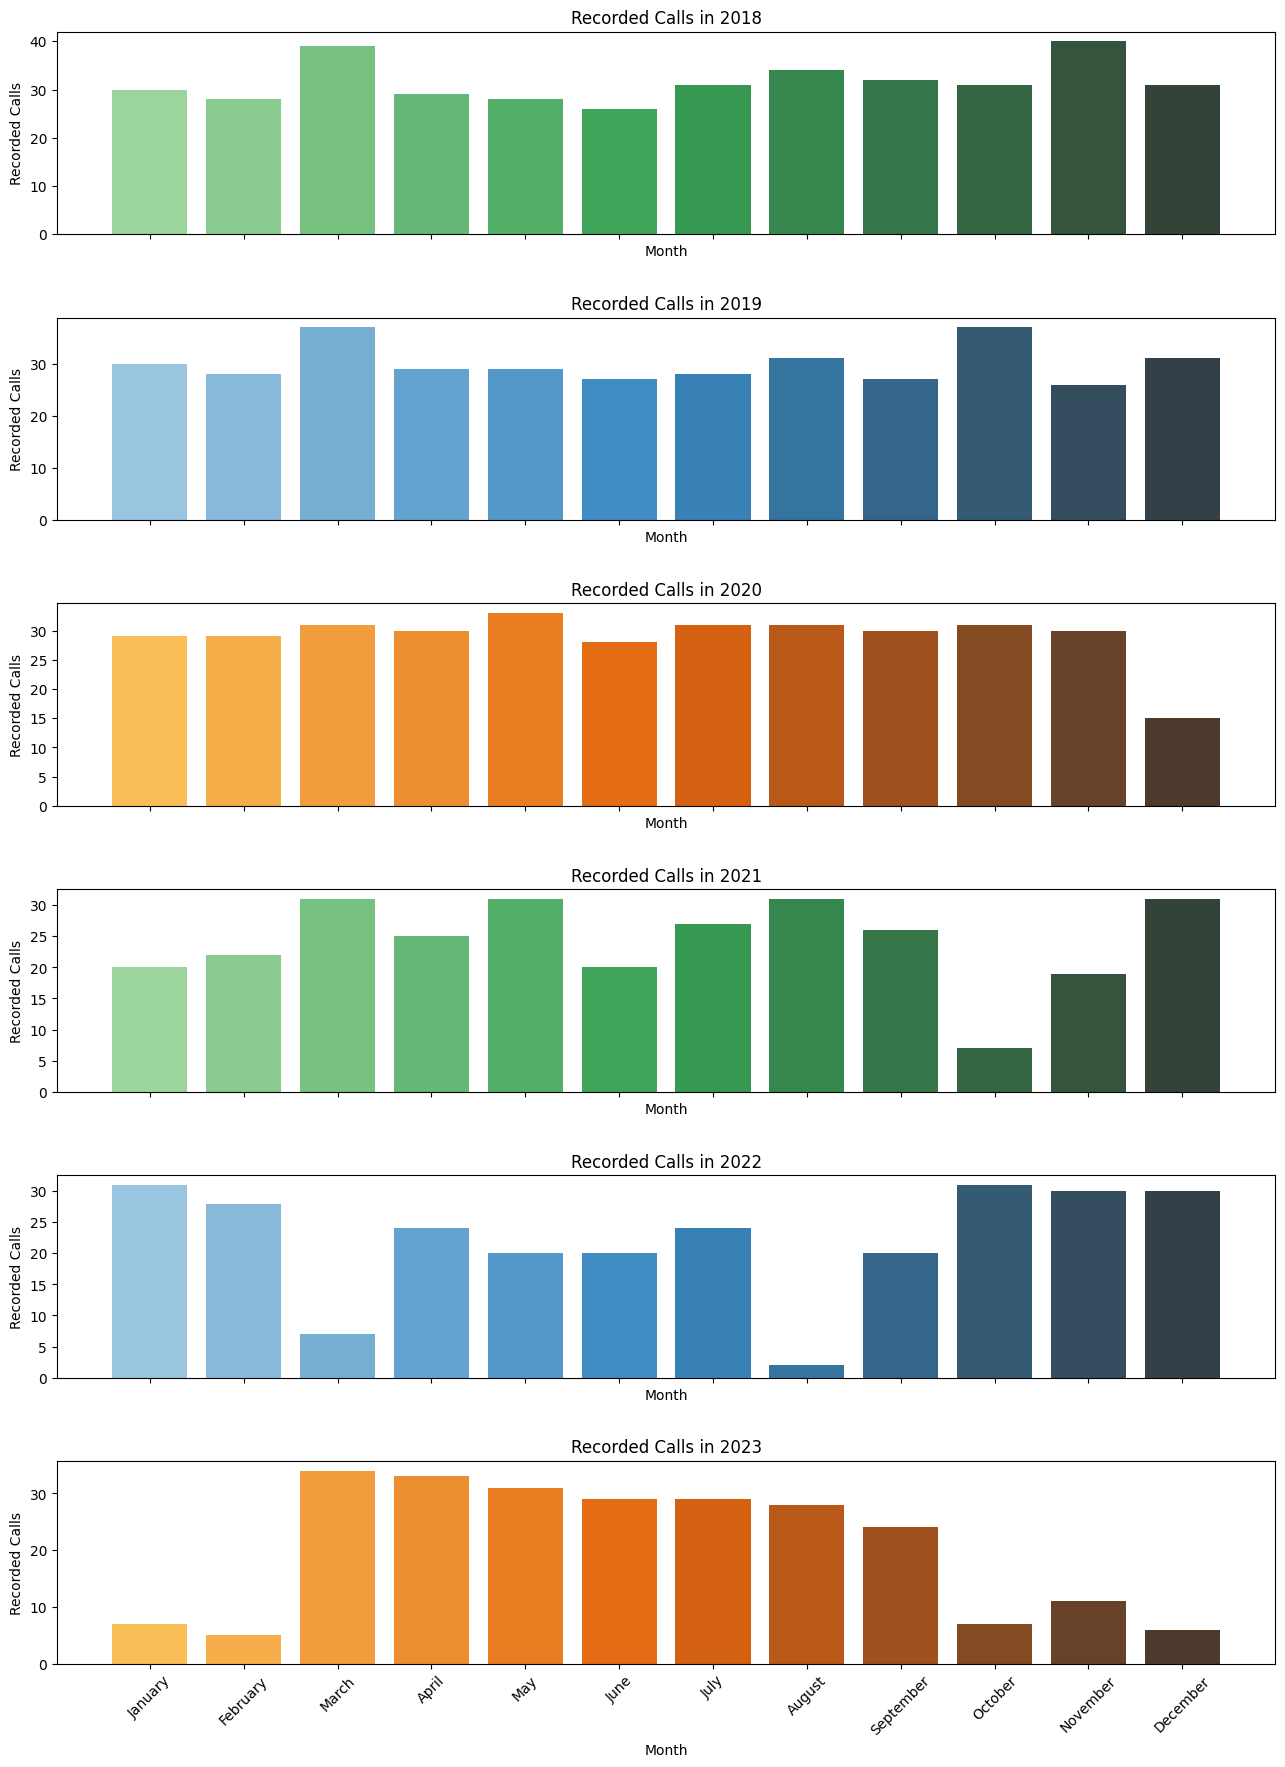

In [43]:
n_years = len(years)

fig, axes = plt.subplots(n_years, 1, figsize=(14, 3 * n_years), sharex=True)
fig.tight_layout(pad=5.0)

palettes = [sns.color_palette("Greens_d", len(months)),
            sns.color_palette("Blues_d", len(months)),
            sns.color_palette("YlOrBr_d", len(months))]

for i, year in enumerate(years):
    ax = axes[i]
    recorded_count = [df_metadata.loc[df_metadata['score_calculated_year'] == year, month + '_recorded_calls'].values[0] for month in months]
    colors = palettes[i % len(palettes)]
    ax.bar(months, recorded_count, color=colors)
    ax.set_title(f'Recorded Calls in {year}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Recorded Calls')

plt.xticks(rotation=45)
plt.show()

**Call Volume Analysis by Year**

- ***2020 and 2021:***  Call volume exhibited consistent patterns with minimal month-to-month fluctuations.
- ***2018, 2019, 2022, and 2023:*** Call volume in these years lacked any discernible trend. The data for these years showed significant fluctuations, making it difficult to identify any meaningful patterns.

**Conclusion:**

The call volume data for 2020 and 2021 suggests a period of relative stability. In contrast, the data from 2018, 2019, 2022, and 2023 indicates erratic call patterns that require further investigation to uncover potential underlying trends.

In [44]:
df_metadata.groupby(['score_calculated_year'], as_index = False)['total_recorded_calls'].sum()

,score_calculated_year,total_recorded_calls
0,2018,5115
1,2019,5936
2,2020,5262
3,2021,5148
4,2022,4687
5,2023,4964


The above table gives the number of calls, across all metrics made from 2018.

In [45]:
df_total = df_metadata.groupby(['metric_name'], as_index = False)['total_recorded_calls'].sum()
df_total = df_total.sort_values(by='total_recorded_calls', ascending=False)

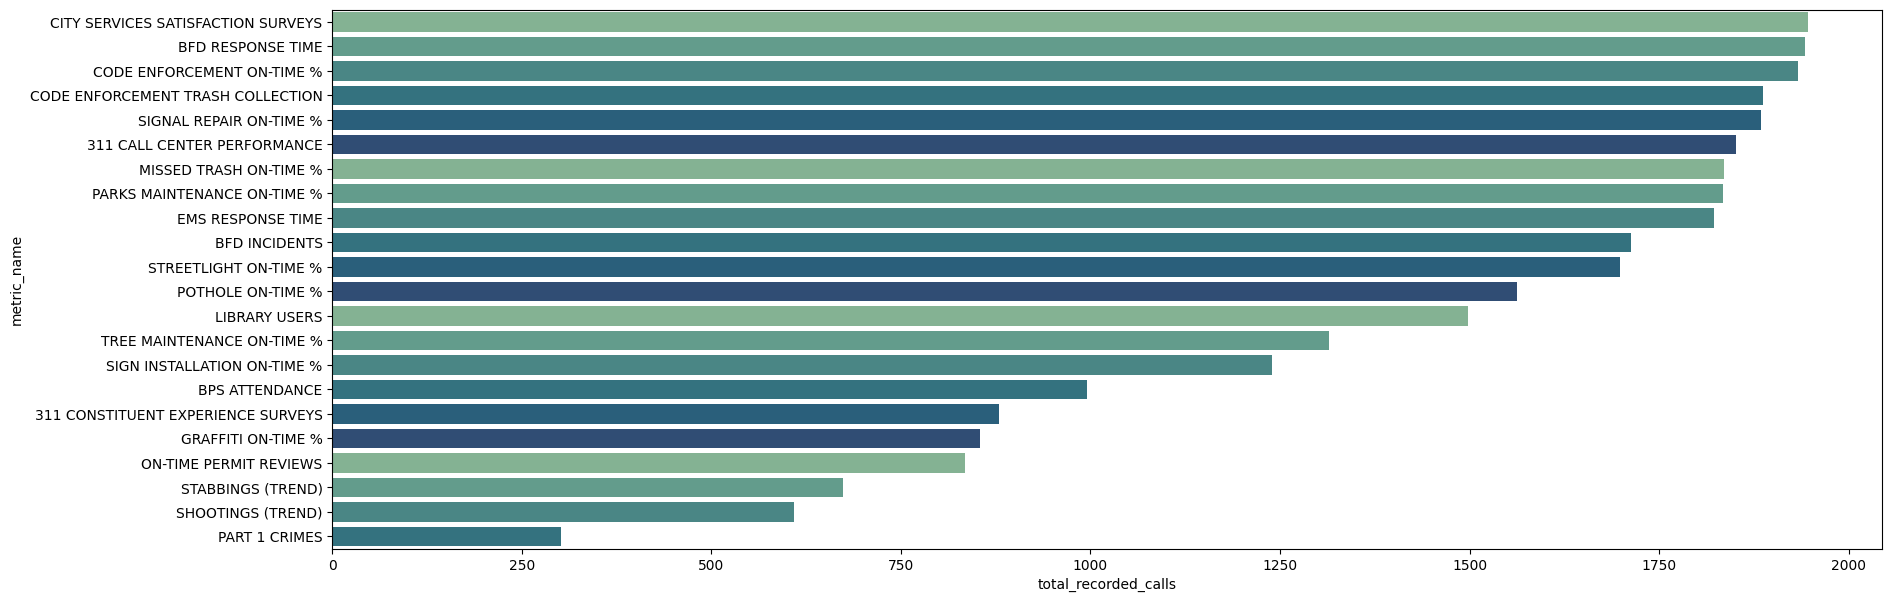

In [46]:
plt.figure(figsize = (20, 7))
pal = sns.color_palette("crest")
sns.barplot(x = df_total['total_recorded_calls'],
            y = df_total['metric_name'], palette = pal, hue = df_total['metric_name'])
plt.show()

**Service-Specific Information**


***City Services Satisfaction:***

A quality assurance process exists for 311 calls (likely for non-emergency services). When a user provides an email address during their request, they receive a notification upon case closure and an opportunity to rate their experience through a satisfaction survey.

***Boston Fire Department (BFD) Response Time:***

The BFD aims for a rapid response to emergencies. Their target response time is for the first fire truck to arrive on-scene within four minutes or less, 90% of the time, after being dispatched from the station upon receiving a 911 call.

***Part 1 Crimes and CityScore:***

CityScore utilizes data on "Part 1 Crimes" reported to the FBI, which encompasses serious offenses like aggravated assault, robbery, arson, burglary, larceny-theft, and motor vehicle theft. However, CityScore specifically excludes homicides, shootings, and stabbings from this metric for trend analysis. These more severe crimes are tracked independently. A CityScore greater than 1 signifies a decrease in overall Part 1 Crimes compared to the historical average.

###EMS response time analysis

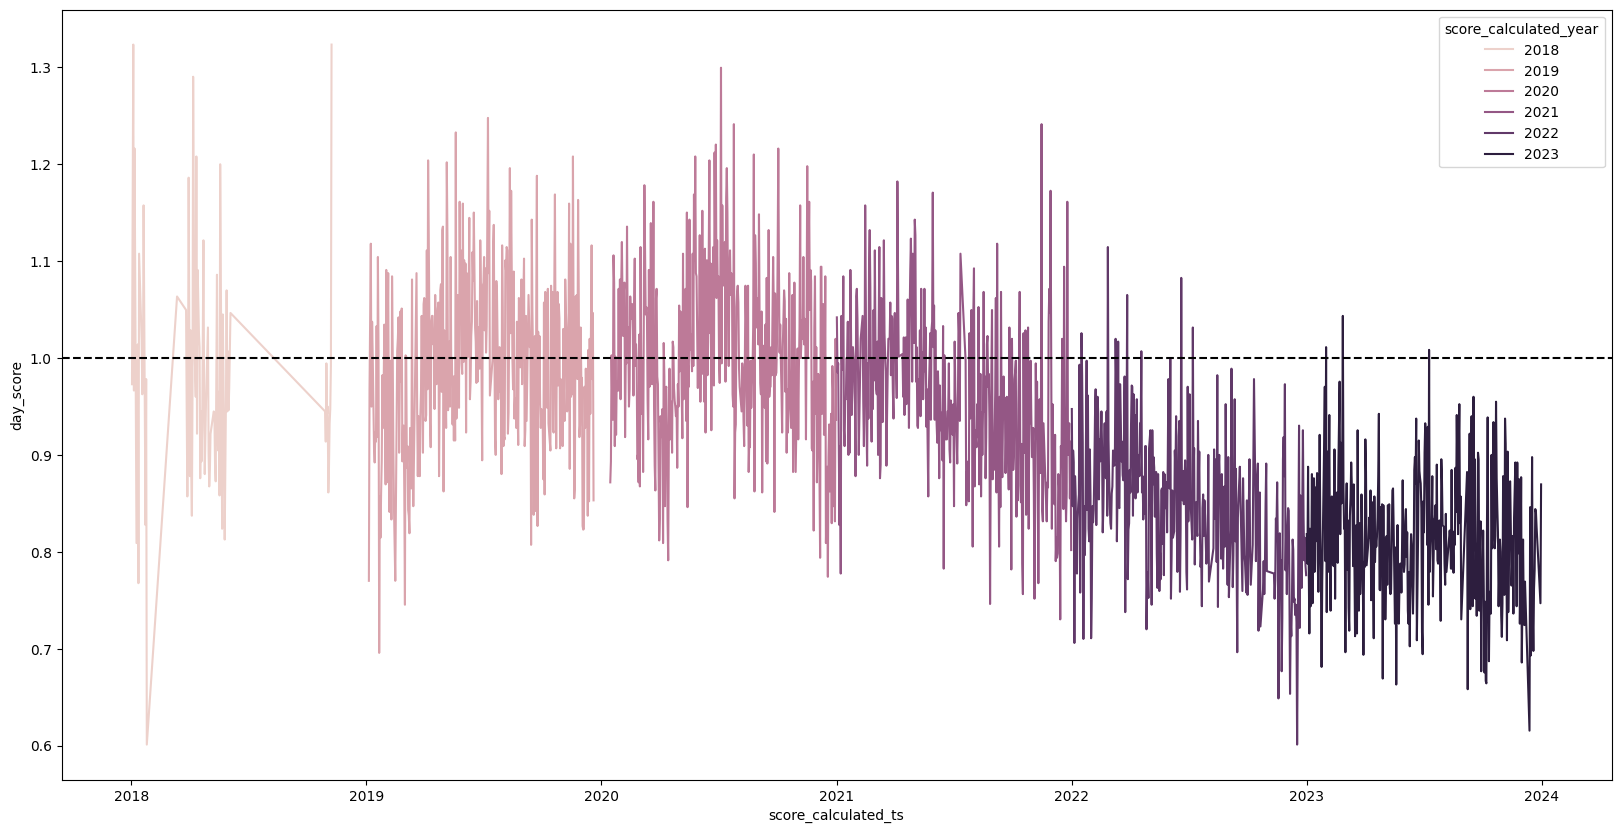

In [47]:
threshold = 1.0
plt.figure(figsize = (20, 10))
# Filter the DataFrame for the specific metric before plotting
df_filtered = df[df['metric_name'] == 'EMS RESPONSE TIME']
sns.lineplot(x = df_filtered['score_calculated_ts'], y = df_filtered['day_score'], hue = df_filtered['score_calculated_year'])
plt.axhline(y=threshold, color='black', linestyle='--', label='Threshold')
plt.show()

**Observation on Target Day Scores**

From 2019 to 2021, the target day score has consistently been met. However, there has been a noticeable decline in 2022, with a substantial drop in 2023.

***Implications***

This trend suggests that the Emergency Services of the City have not been adequately pursuing their performance objectives. The increase in both the city's resident population and visitors over recent years has resulted in a higher volume of emergency medical 911 calls. Despite this increased demand, the EMS budget has not expanded correspondingly to enable the hiring of additional EMTs or the replacement of aging ambulances

In [48]:
df_filtered['score_calculated_month'] = pd.Categorical(df_filtered['score_calculated_month'], categories=months, ordered=True)

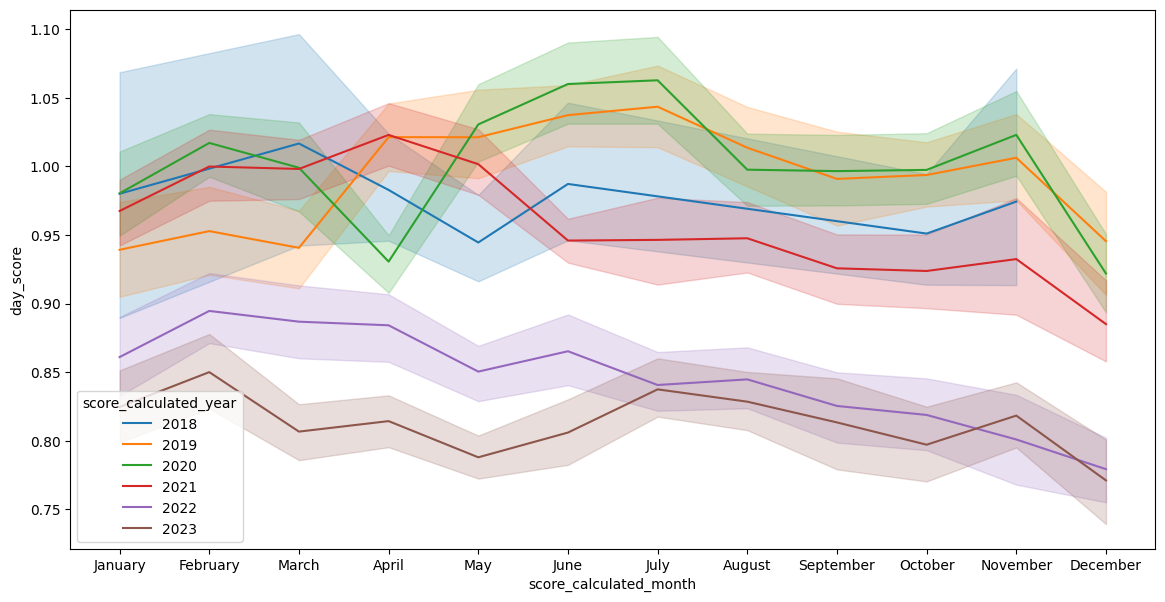

In [49]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=df_filtered['score_calculated_month'], y = df_filtered['day_score'], hue=df_filtered['score_calculated_year'], palette='tab10')
plt.show()

Seasonal plot gives more month-wise insight to the above observation

### Sign Installation On time and Signal Repair on Time Analysis

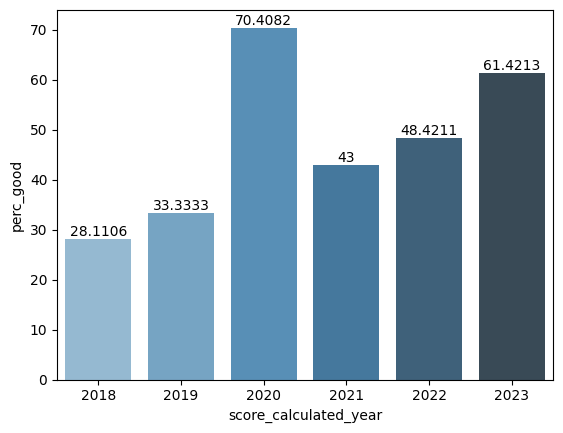

In [50]:
pal = sns.color_palette("Blues_d", len(df_metadata[df_metadata['metric_name'] == 'SIGN INSTALLATION ON-TIME %']))
ax = sns.barplot(x = df_metadata[df_metadata['metric_name'] == 'SIGN INSTALLATION ON-TIME %']['score_calculated_year'],
            y = df_metadata[df_metadata['metric_name'] == 'SIGN INSTALLATION ON-TIME %']['perc_good'],
            palette = pal,
            hue = df_metadata[df_metadata['metric_name'] == 'SIGN INSTALLATION ON-TIME %']['score_calculated_year'],
            legend = False)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

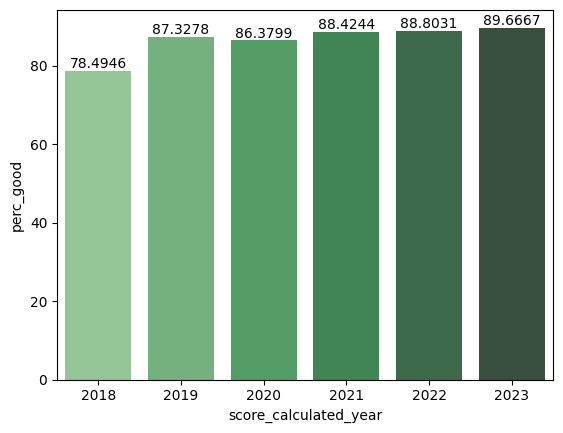

In [51]:
pal = sns.color_palette("Greens_d", len(df_metadata[df_metadata['metric_name'] == 'SIGNAL REPAIR ON-TIME %']))
ax = sns.barplot(x = df_metadata[df_metadata['metric_name'] == 'SIGNAL REPAIR ON-TIME %']['score_calculated_year'],
            y = df_metadata[df_metadata['metric_name'] == 'SIGNAL REPAIR ON-TIME %']['perc_good'],
            palette = pal,
            hue = df_metadata[df_metadata['metric_name'] == 'SIGNAL REPAIR ON-TIME %']['score_calculated_year'],
            legend = False)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

**Analysis of Sign Installation Performance**

The graphs indicate a positive trend in both metrics over the years. As per data from Boston.gov, since the introduction of CityScore, over 88% of sign installation cases have been completed on schedule. Furthermore, sign installations have increased by 21% within a six-month period.

###Analysing Part 1 Crimes

In [52]:
df_melted = pd.melt(df_metadata[df_metadata['metric_name'] == 'PART 1 CRIMES'][['score_calculated_year','perc_good', 'total_recorded_calls']], ['score_calculated_year'])

In [53]:
df_melted2 = pd.melt(df_metadata[df_metadata['metric_name'] == 'PART 1 CRIMES'][['score_calculated_year','January_recorded_calls', 'February_recorded_calls', 'March_recorded_calls', 'April_recorded_calls',
                                                            'May_recorded_calls', 'June_recorded_calls', 'July_recorded_calls',
                                                            'August_recorded_calls', 'September_recorded_calls', 'October_recorded_calls', 'November_recorded_calls', 'December_recorded_calls']], ['score_calculated_year'])

<Axes: xlabel='score_calculated_year', ylabel='value'>

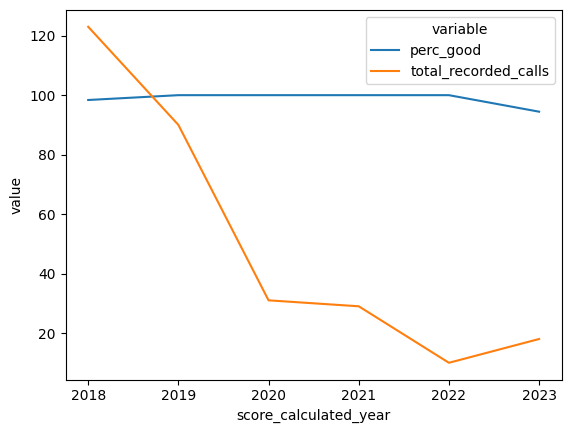

In [54]:
sns.lineplot(data=df_melted, x='score_calculated_year', y='value', hue='variable')

**Assessment of Day Score and Part-1 Crime Calls**

As previously noted, a day score greater than 1 signifies a reduction in Part-1 crimes. The graph demonstrates a significant decline in the number of calls associated with this metric. The percentage of calls meeting the target day score has consistently been close to 100%, reflecting the government's prompt and effective response to these crimes.

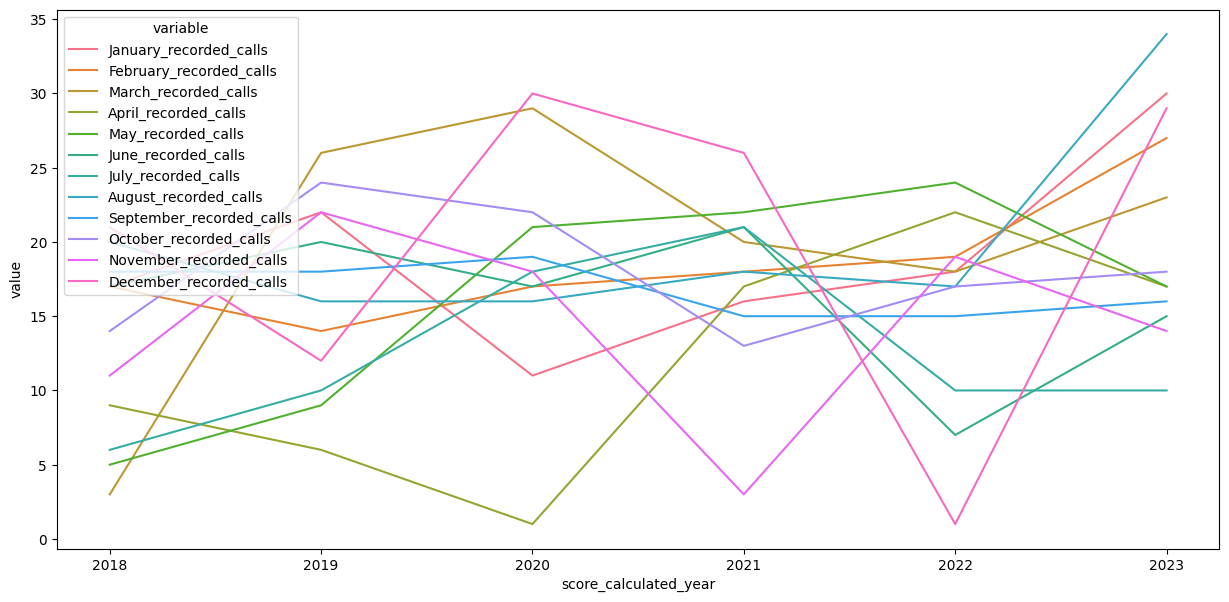

In [55]:
plt.figure(figsize = (15, 7))
sns.lineplot(data=df_melted2, x='score_calculated_year', y='value', hue='variable')
plt.show()

**Monthly Analysis of Part-1 Crime Calls**

An examination of month-by-month calls recorded for Part-1 crimes over several years reveals no discernible correlation, trend, or pattern. Specifically, there is no evidence of seasonality; thus, it can be concluded that weather conditions, such as extreme winter or snowstorms, do not influence the occurrence of these crimes